In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Loading the dataset

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.sample(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
312,89382602,B,12.76,13.37,82.29,504.1,0.08794,0.07948,0.04052,0.025480,...,16.40,92.04,618.8,0.1194,0.22080,0.17690,0.08411,0.2564,0.08253,NaN
98,862485,B,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.033500,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,NaN
48,857155,B,12.05,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,...,20.70,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301,NaN
425,907367,B,10.03,21.28,63.19,307.3,0.08117,0.03912,0.00247,0.005159,...,28.94,69.92,376.3,0.1126,0.07094,0.01235,0.02579,0.2349,0.08061,NaN
236,88299702,M,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.123700,...,34.51,206.00,2944.0,0.1481,0.41260,0.58200,0.25930,0.3103,0.08677,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis (EDA)

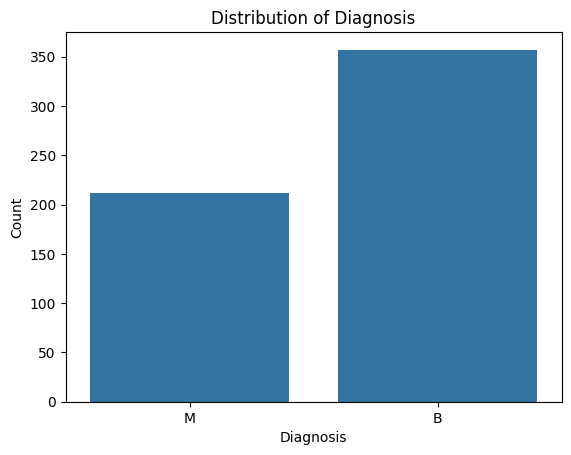

In [9]:
import seaborn as sns

# Visualize the distribution of the target variable
sns.countplot(x=df['diagnosis'])
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


In [10]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

# Encoding the Target Variable

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [12]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
521,1,24.630,21.60,165.50,1841.0,0.10300,0.21060,0.2310,0.14710,0.1991,...,29.920,26.93,205.70,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671
538,0,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0000,0.00000,0.1870,...,9.077,30.92,57.17,248.0,0.1256,0.0834,0.0000,0.0000,0.3058,0.09938
117,1,14.870,16.67,98.64,682.5,0.11620,0.16490,0.1690,0.08923,0.2157,...,18.810,27.37,127.10,1095.0,0.1878,0.4480,0.4704,0.2027,0.3585,0.10650
77,1,18.050,16.15,120.20,1006.0,0.10650,0.21460,0.1684,0.10800,0.2152,...,22.390,18.91,150.10,1610.0,0.1478,0.5634,0.3786,0.2102,0.3751,0.11080
256,1,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.1784,0.11440,0.1893,...,25.050,36.27,178.60,1926.0,0.1281,0.5329,0.4251,0.1941,0.2818,0.10050


In [13]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

## Splitting Data into Training and Testing Sets


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

## Feature Scaling


In [16]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()

In [17]:
x_train =scaler.fit_transform(x_train)

In [18]:
x_test= scaler.transform(x_test)

## Training Model


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
y_pred = lr.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)

In [24]:
accuracy

0.9736842105263158

### Random forest 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [27]:
rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
y_pred = rf.predict(x_test)

In [29]:
accu_rf = accuracy_score(y_test, y_pred)

In [30]:
accu_rf

0.9649122807017544

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [32]:
print(confusion_matrix(y_test, y_pred))

[[70  1]
 [ 3 40]]


## XGBoost

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
from xgboost import XGBClassifier

In [35]:
xgb = XGBClassifier(
    n_estimators=100,  # number of trees
    learning_rate=0.1, # step size 
    max_depth=5,    # maximum depth of each tree
    random_state=42, 
    colsample_bytree=0.8 # fraction of features to be used for each tree
)

In [36]:
xgb.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [37]:
y_pred = xgb.predict(x_test)

In [38]:
accu_xgb = accuracy_score(y_test, y_pred)

In [39]:
accu_xgb

0.956140350877193